In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [2]:
# Read the DataFrame from the CSV file
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Renenaming genere column name as gender
df.rename(columns={'Genre': 'Gender'}, inplace=True)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Let us see Gender Distribution

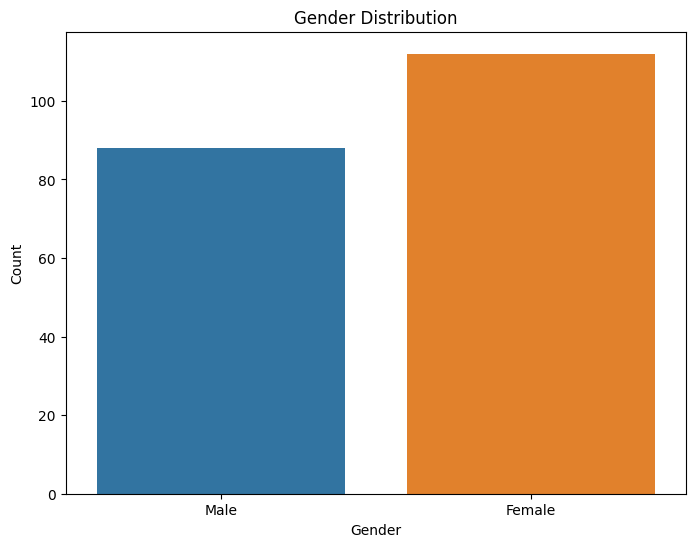

In [11]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Here we can see female cont is more than male

#### Age Distribution

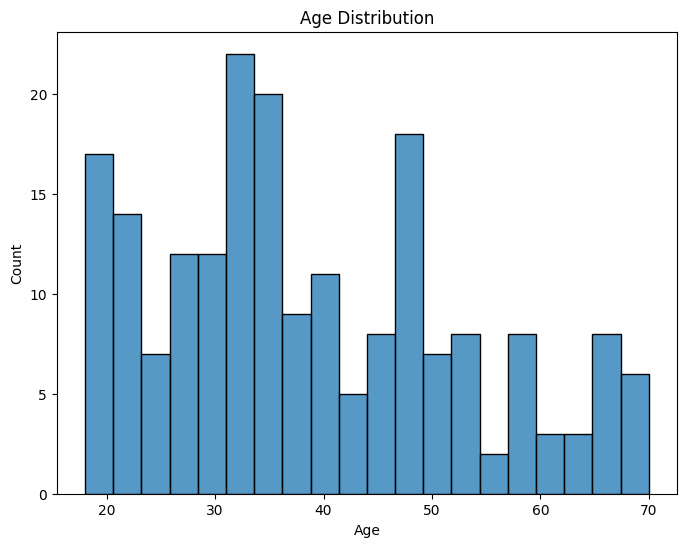

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### The ages are mostly between 30 and 40

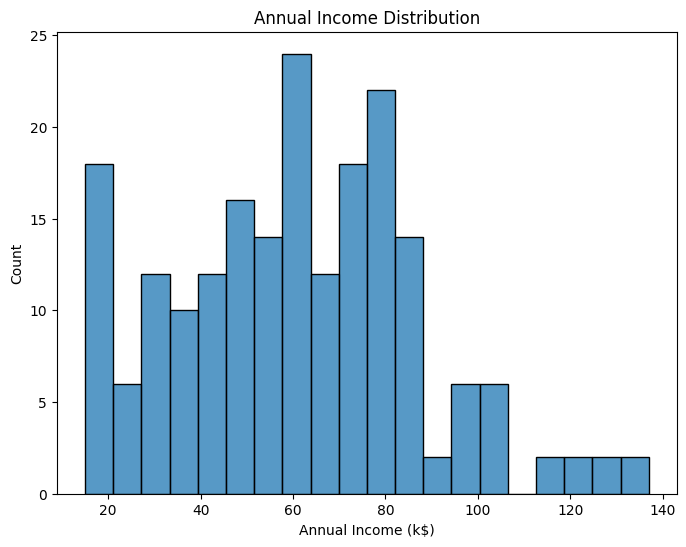

In [13]:
# Annual Income Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Annual Income (k$)', bins=20)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

##### Most of the incomes lie between the 60 and 85,000 dollar

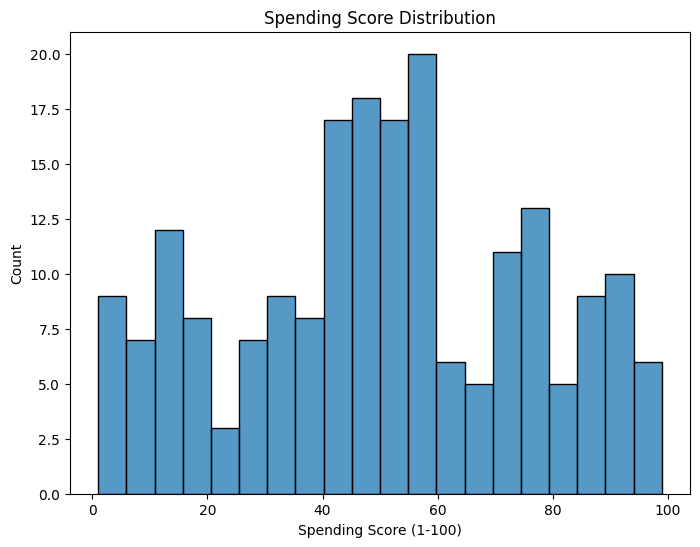

In [14]:
# Spending Score Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Spending Score (1-100)', bins=20)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

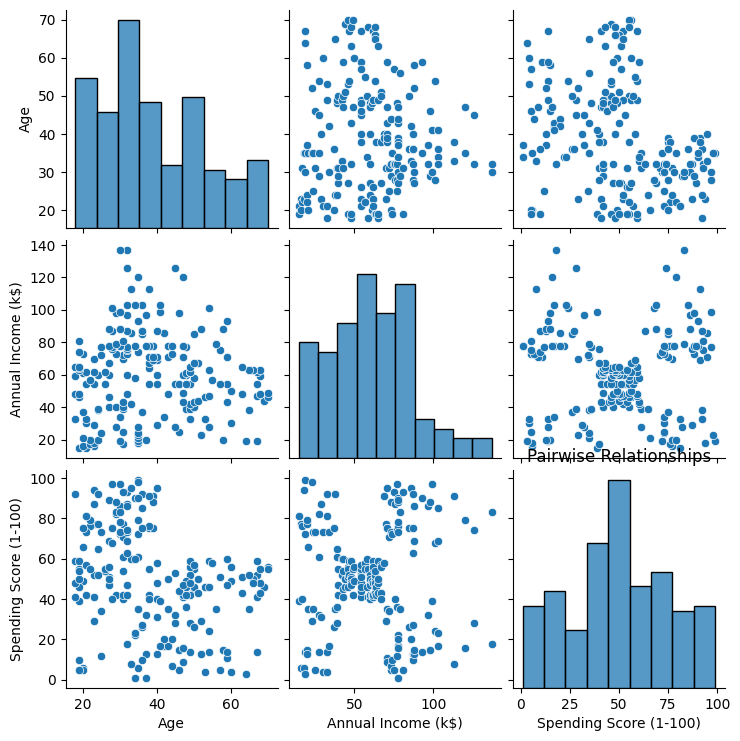

In [15]:
# Pairwise Relationships (Age, Annual Income, Spending Score)
sns.pairplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Pairwise Relationships')
plt.show()

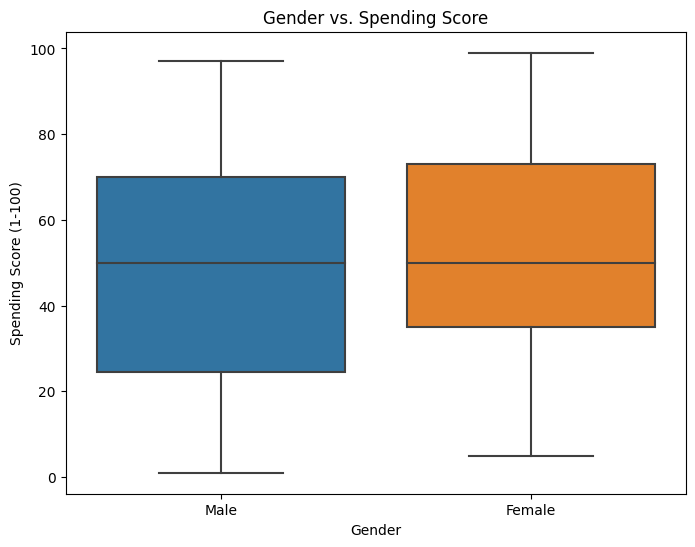

In [16]:
# Gender and Spending Score
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')
plt.title('Gender vs. Spending Score')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()


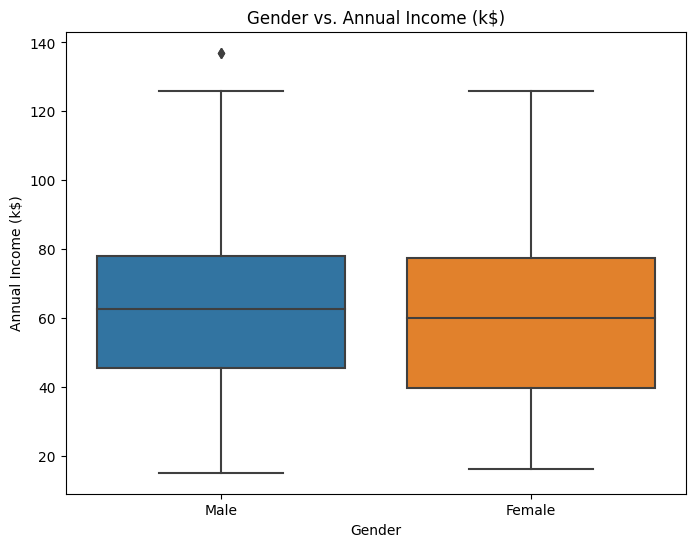

In [17]:
# Gender and income
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Annual Income (k$)')
plt.title('Gender vs. Annual Income (k$)')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.show()

#### females have low income than male but their spending score is high

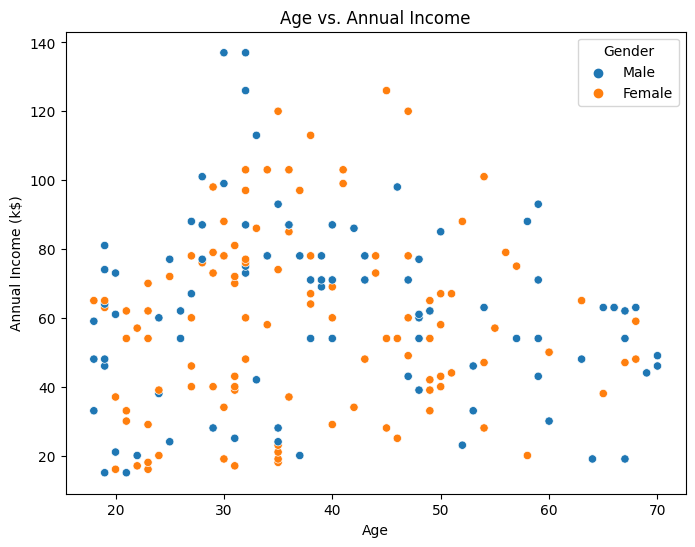

In [18]:
# Age and Annual Income
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender')
plt.title('Age vs. Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

##### age grp 30-45  have high income

### Data processing

In [19]:
# Drop irrelevant columns (if any)
df = df.drop("CustomerID", axis=1)

In [20]:
# Encode Gender column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [21]:
# Standardize the numerical columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

### clustering

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

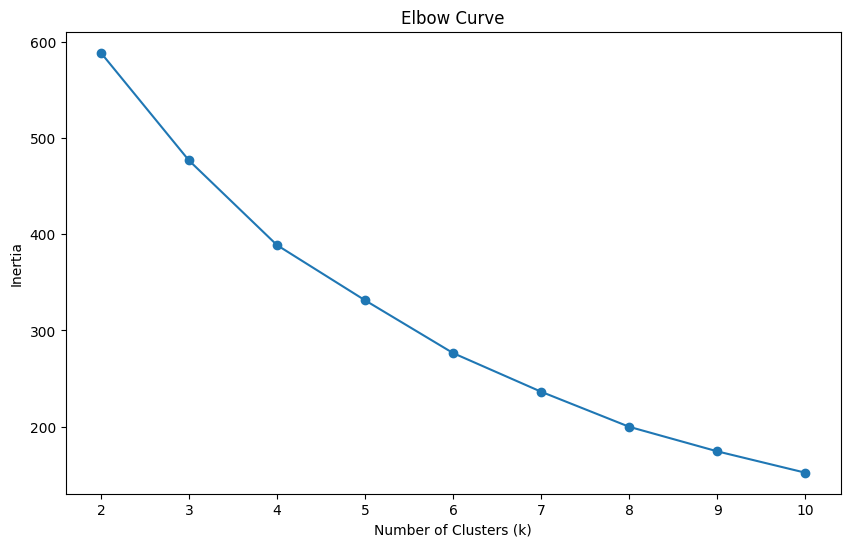

In [22]:
# Elbow method to determine the optimal number of clusters
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.show()


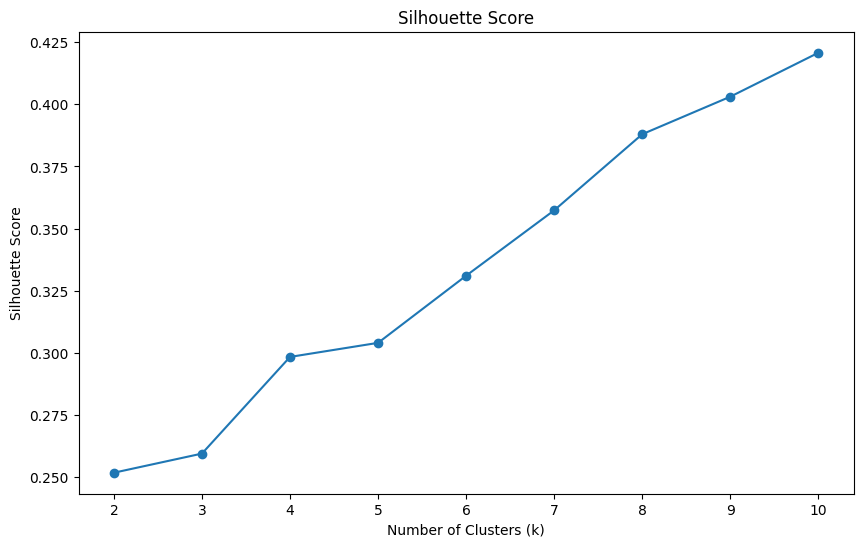

In [23]:
# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [24]:
# Choose the optimal number of clusters based on the elbow curve and silhouette score
k = 5  # Set the desired number of clusters


In [25]:
# Fit the K-means model with the selected number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [26]:
# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

In [27]:
# Analyze the results
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  


Cluster 0 - Size: 39
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
count  39.000000  39.000000           39.000000               39.000000   
mean    0.461538  32.692308           86.538462               82.128205   
std     0.505035   3.728650           16.312485                9.364489   
min     0.000000  27.000000           69.000000               63.000000   
25%     0.000000  30.000000           75.500000               74.500000   
50%     0.000000  32.000000           79.000000               83.000000   
75%     1.000000  35.500000           95.000000               90.000000   
max     1.000000  40.000000          137.000000               97.000000   

       Cluster  
count     39.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
Cluster 1 - Size: 29
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
count  29.000000  29.000000           29.000000       

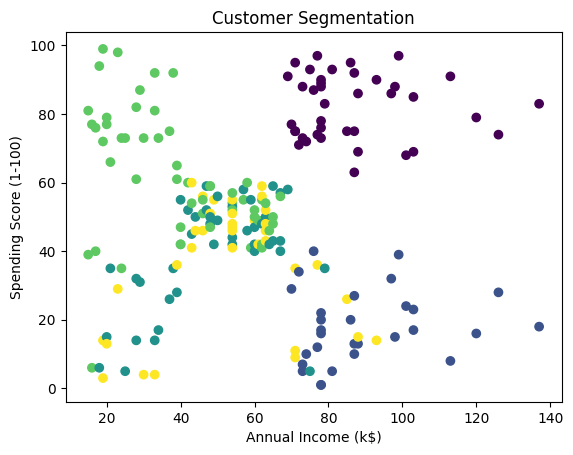

In [28]:
# Explore the characteristics of each cluster
for i in range(k):
    print(f"Cluster {i} - Size: {len(df[df['Cluster'] == i])}")
    print(df[df['Cluster'] == i].describe())

# Visualize the clusters (you can choose the appropriate plots based on your data)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.show()